### Działanie sztucznego neuronu ze skokową funkcją aktywacyjną

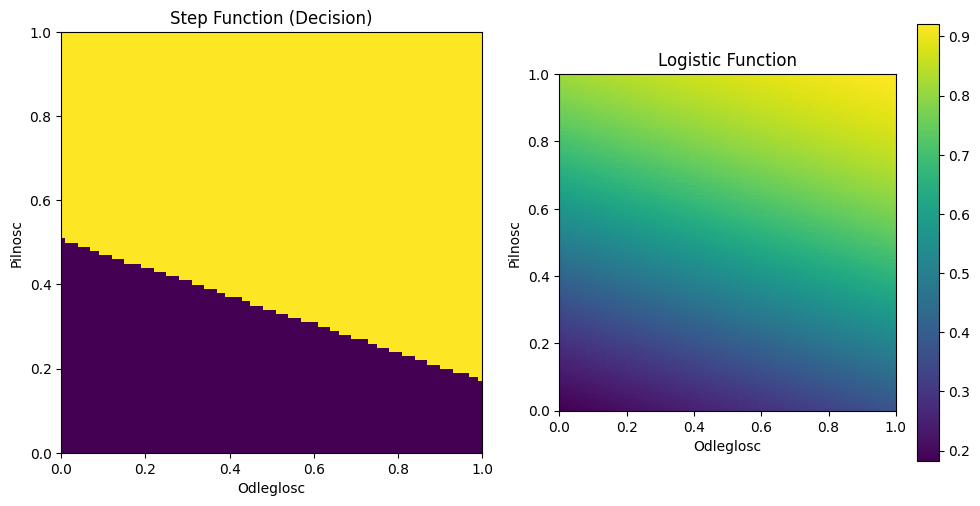

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Create a grid of values
x = np.arange(0, 1, 0.01)
y = x.copy()
X, Y = np.meshgrid(x, y)

# Define weights and similarity score
wx, wy = 0.1, 0.3
S = wx * X + wy * Y

# Step function (binary decision)
out_step = S > 0.15

# Logistic function
out_logistic = 1 / (1 + np.exp(-10 * (S - 0.15)))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: Step function
axs[0].imshow(out_step, cmap="viridis", origin="lower", extent=[0, 1, 0, 1])
axs[0].set_title("Step Function (Decision)")
axs[0].set_xlabel("Odleglosc")
axs[0].set_ylabel("Pilnosc")

# Right plot: Logistic function
c = axs[1].imshow(out_logistic, cmap="viridis", origin="lower", extent=[0, 1, 0, 1])
axs[1].set_title("Logistic Function")
axs[1].set_xlabel("Odleglosc")
axs[1].set_ylabel("Pilnosc")

# Add colorbar to logistic plot
fig.colorbar(c, ax=axs[1])

plt.tight_layout()
plt.show()


### Praktyczna implementacja za pomocą biblioteki Keras

2024-11-18 18:25:35.446877: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 18:25:35.561663: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 18:25:35.610956: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731950735.695231 1351243 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731950735.714165 1351243 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 18:25:35.860205: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,835 (34.51 KB)

 Trainable params: 8,835 (34.51 KB)

 Non-trainable params: 0 (0.00 B)

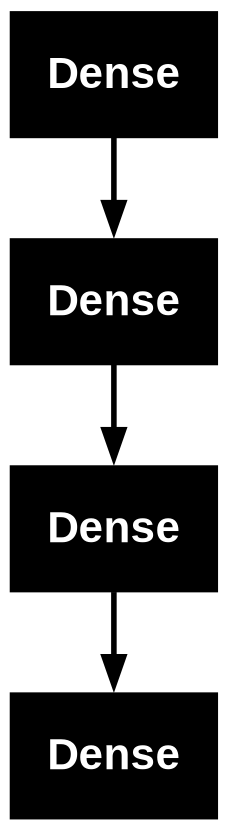

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
y, X = data.target, data.data
y = pd.Categorical(y)
y = pd.get_dummies(y)
class_num = y.shape[1]
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(class_num, activation="softmax"))

# Compile the model
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Plot the model
plot_model(model, to_file="my_model.png")

### Przykład uczenia sieci neuronowej

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/500
4/4 - 1s - 276ms/step - accuracy: 0.4833 - loss: 1.0563 - val_accuracy: 0.5000 - val_loss: 1.0668
Epoch 2/500
4/4 - 0s - 9ms/step - accuracy: 0.5917 - loss: 1.0410 - val_accuracy: 0.6000 - val_loss: 1.0536
Epoch 3/500
4/4 - 0s - 9ms/step - accuracy: 0.6750 - loss: 1.0262 - val_accuracy: 0.6333 - val_loss: 1.0405
Epoch 4/500
4/4 - 0s - 10ms/step - accuracy: 0.7167 - loss: 1.0118 - val_accuracy: 0.6333 - val_loss: 1.0276
Epoch 5/500
4/4 - 0s - 11ms/step - accuracy: 0.7333 - loss: 0.9977 - val_accuracy: 0.6667 - val_loss: 1.0148
Epoch 6/500
4/4 - 0s - 10ms/step - accuracy: 0.8000 - loss: 0.9842 - val_accuracy: 0.6667 - val_loss: 1.0023
Epoch 7/500
4/4 - 0s - 10ms/step - accuracy: 0.8250 - loss: 0.9707 - val_accuracy: 0.6667 - val_loss: 0.9898
Epoch 8/500
4/4 - 0s - 10ms/step - accuracy: 0.8417 - loss: 0.9572 - val_accuracy: 0.6667 - val_loss: 0.9774
Epoch 9/500
4/4 - 0s - 10ms/step - accuracy: 0.8500 - loss: 0.9439 - val_accuracy: 0.7000 - val_loss: 0.9651
Epoch 10/500
4/4 - 0

### Pobranie historii uczenia modelu oraz jego wizualizacja

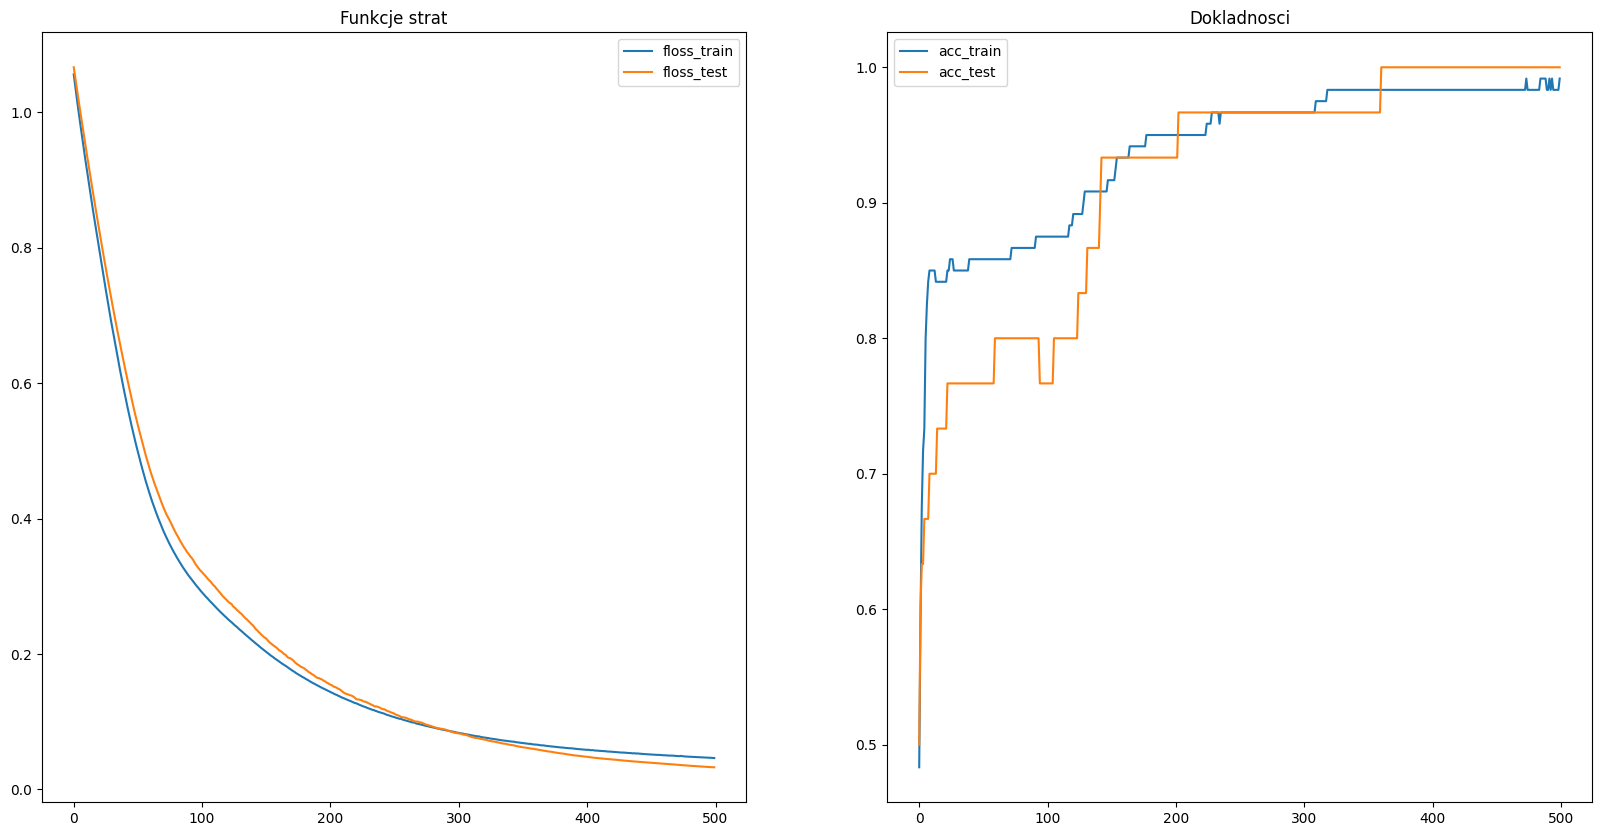

In [5]:
from matplotlib import pyplot as plt
import numpy as np
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 500)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

### Zastosowanie walidacji krzyżowej


In [8]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
accs = [(0, 0)]
scaler = StandardScaler()

# Convert y_train to numpy array if it is a pandas DataFrame or Series
y_train = np.array(y_train)

for train_index, test_index in KFold(5).split(X_train):
    X_train_cv = X_train[train_index, :]
    X_test_cv = X_train[test_index, :]
    y_train_cv = y_train[train_index]
    y_test_cv = y_train[test_index]
    
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)
    
    model.fit(X_train_cv, y_train_cv, batch_size=32, epochs=100, validation_data=(X_test_cv, y_test_cv), verbose=2)
    
    y_pred = model.predict(X_test_cv).argmax(axis=1)
    y_test_cv = y_test_cv.argmax(axis=1)
    
    accs.append((accuracy_score(y_test_cv, y_pred), train_index))
    
best_acc = max(accs[1:], key=lambda x: x[0])

print(f"Najlepszy wynik: model nr {best_acc[1]}")
print(f"Dokładność: {best_acc[0]}")


Epoch 1/100


3/3 - 0s - 28ms/step - accuracy: 0.9896 - loss: 0.0294 - val_accuracy: 0.9583 - val_loss: 0.0583
Epoch 2/100
3/3 - 0s - 15ms/step - accuracy: 0.9896 - loss: 0.0237 - val_accuracy: 0.9583 - val_loss: 0.0521
Epoch 3/100
3/3 - 0s - 19ms/step - accuracy: 0.9896 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0438
Epoch 4/100
3/3 - 0s - 21ms/step - accuracy: 0.9896 - loss: 0.0143 - val_accuracy: 1.0000 - val_loss: 0.0378
Epoch 5/100
3/3 - 0s - 19ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0344
Epoch 6/100
3/3 - 0s - 17ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0323
Epoch 7/100
3/3 - 0s - 15ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0314
Epoch 8/100
3/3 - 0s - 15ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0311
Epoch 9/100
3/3 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0317
Epoch 10/100
3/3 - 0s - 16ms/st